In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime
# import requests_cache
# import yfinance as yf

In [2]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 12, 31)

symbol=['NKE','MSFT','AAPL','CVX','IBM','AXP']


# session = requests_cache.CachedSession('yfinance.cache')
# session.headers['User-agent'] = 'my-program/1.0'

data_exchange={}
for s in symbol:
      data_exchange[s] =  web.get_data_yahoo(s, start=start, end=end)#, session=session) 


In [3]:
data_exchange['NKE'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,52.500000,51.770000,51.990002,51.980000,13295600.0,49.233562
2017-01-04,53.349998,52.090000,52.230000,53.070000,13759500.0,50.265965
2017-01-05,53.099998,52.439999,52.919998,53.060001,8682200.0,50.256500
2017-01-06,54.090000,52.980000,53.090000,53.910000,12532400.0,51.061581
2017-01-09,53.990002,53.220001,53.959999,53.380001,8835300.0,50.559597


In [4]:
def pivot_tikers(dict_df,col):
    item=[]
    tikers=[]
    for tiker in data_exchange.keys():
        data=dict_df[tiker][col]
        item.append(data)
        tikers.append(tiker)
    combine=pd.concat(item, axis=1) 
    combine.columns=tikers
    return combine
    

In [5]:
stoks_open=pivot_tikers(data_exchange,'Open')
stoks_open.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,51.990002,62.790001,28.950001,118.379997,159.655838,74.889999
2017-01-04,52.230000,62.480000,28.962500,118.410004,160.391968,75.260002
2017-01-05,52.919998,62.189999,28.980000,118.000000,161.806885,76.000000
2017-01-06,53.090000,62.299999,29.195000,117.449997,161.271515,75.400002
2017-01-09,53.959999,62.759998,29.487499,116.290001,162.017212,76.139999


In [6]:
stoks_close=pivot_tikers(data_exchange,'Close')
stoks_close.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,51.980000,62.580002,29.037500,117.849998,159.837479,75.349998
2017-01-04,53.070000,62.299999,29.004999,117.820000,161.816437,76.260002
2017-01-05,53.060001,62.299999,29.152500,117.309998,161.281067,75.320000
2017-01-06,53.910000,62.840000,29.477501,116.839996,162.074570,75.470001
2017-01-09,53.380001,62.639999,29.747499,115.839996,160.277252,75.860001


In [7]:
stoks_volume=pivot_tikers(data_exchange,'Volume')
stoks_volume.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,13295600.0,20694100.0,115127600.0,7404800.0,3069278.0,5853900.0
2017-01-04,13759500.0,21340000.0,84472400.0,6679900.0,3536944.0,4635800.0
2017-01-05,8682200.0,24876000.0,88774400.0,5928600.0,2805686.0,3383000.0
2017-01-06,12532400.0,19922900.0,127007600.0,4762500.0,3080993.0,3089600.0
2017-01-09,8835300.0,20382700.0,134247600.0,6891800.0,3336635.0,4818700.0


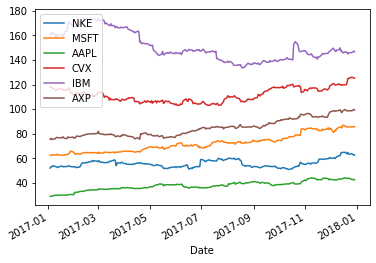

In [8]:
stoks_close.plot();

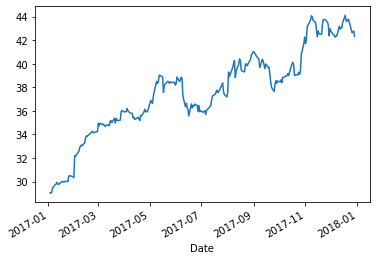

In [9]:
stoks_close['AAPL'].plot();

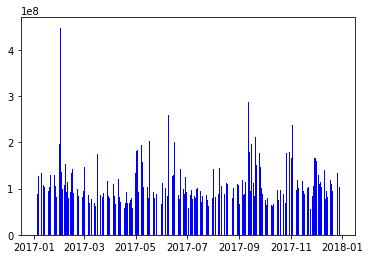

In [10]:
plt.bar(stoks_volume['AAPL'].index,stoks_volume['AAPL'].values, color ='b');

In [11]:
# Здесь разбираемся сами и совмещаем два графика



### Вычисляем ежедневное процентное закрытие
$$ r_t =\dfrac{p_t}{p_{t-1}}-1 $$

In [12]:
daily_pct_na=(stoks_close/stoks_close.shift(1)-1)
daily_pct_na.head()

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.020970,-0.004474,-0.001119,-0.000255,0.012381,0.012077
2017-01-05,-0.000188,0.000000,0.005085,-0.004329,-0.003309,-0.012326
2017-01-06,0.016020,0.008668,0.011148,-0.004006,0.004920,0.001992
2017-01-09,-0.009831,-0.003183,0.009159,-0.008559,-0.011089,0.005168


In [13]:
#тут внимательнее с данными
daily_pct_0=(stoks_close/stoks_close.shift(1)-1).fillna(0)
daily_pct_0.head()

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.020970,-0.004474,-0.001119,-0.000255,0.012381,0.012077
2017-01-05,-0.000188,0.000000,0.005085,-0.004329,-0.003309,-0.012326
2017-01-06,0.016020,0.008668,0.011148,-0.004006,0.004920,0.001992
2017-01-09,-0.009831,-0.003183,0.009159,-0.008559,-0.011089,0.005168


### Вычисляем кумулятивную процентную доходность
$$ i_0=r_0=0 $$
$$ i_t=(i_{t-1}+r_t)100 $$

In [14]:
daily_sum_na=(daily_pct_na*100).cumsum()
daily_sum_na.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,2.096961,-0.447431,-0.111928,-0.025455,1.238106,1.207702
2017-01-05,2.078121,-0.447431,0.396608,-0.458321,0.907256,-0.024926
2017-01-06,3.680078,0.419344,1.511438,-0.858969,1.399256,0.174226
2017-01-09,2.696960,0.101074,2.427386,-1.714841,0.290312,0.690987


In [15]:
daily_sum_0=(daily_pct_0*100).cumsum()
daily_sum_0.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,2.096961,-0.447431,-0.111928,-0.025455,1.238106,1.207702
2017-01-05,2.078121,-0.447431,0.396608,-0.458321,0.907256,-0.024926
2017-01-06,3.680078,0.419344,1.511438,-0.858969,1.399256,0.174226
2017-01-09,2.696960,0.101074,2.427386,-1.714841,0.290312,0.690987


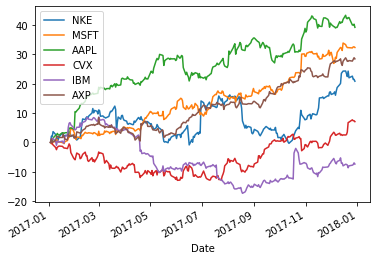

In [16]:
daily_sum_0.plot();

### Вычисляем накопленную процентную доходность
$$ i_0 = 1 $$
$$ i_t = (1+r_t) i_{t-1} $$

In [17]:
daily_prod_na=(1 + daily_pct_na).cumprod()
daily_prod_na.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,1.020970,0.995526,0.998881,0.999745,1.012381,1.012077
2017-01-05,1.020777,0.995526,1.003960,0.995418,1.009032,0.999602
2017-01-06,1.037130,1.004155,1.015153,0.991430,1.013996,1.001593
2017-01-09,1.026933,1.000959,1.024451,0.982944,1.002751,1.006768


In [18]:
daily_prod_0=(1 + daily_pct_0).cumprod()
daily_prod_0.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-04,1.020970,0.995526,0.998881,0.999745,1.012381,1.012077
2017-01-05,1.020777,0.995526,1.003960,0.995418,1.009032,0.999602
2017-01-06,1.037130,1.004155,1.015153,0.991430,1.013996,1.001593
2017-01-09,1.026933,1.000959,1.024451,0.982944,1.002751,1.006768


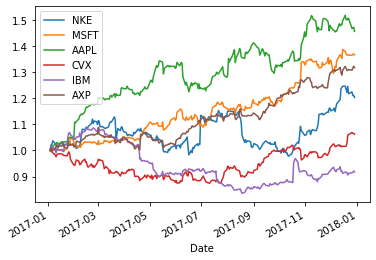

In [19]:
daily_prod_0.plot();

In [20]:
daily_prod_0.asfreq(freq='M')

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-31,1.017699,1.033078,1.044770,0.944845,1.043842,1.013670
2017-02-28,1.099654,1.022371,1.179423,0.954603,1.075543,1.062508
2017-03-31,1.072143,1.052413,1.236849,0.911073,1.041569,1.049900
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,1.019431,1.116011,1.315196,0.878065,0.912913,1.021102
2017-06-30,1.135052,1.101470,1.239948,0.885278,0.920091,1.117983
2017-07-31,1.136014,1.161713,1.280499,0.926517,0.865303,1.131122
2017-08-31,1.015968,1.194791,1.411967,0.913195,0.855494,1.142668
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
month_sum_q=daily_sum_0.asfreq(freq='BM')
month_sum_q

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-31,1.828790,3.315269,4.410636,-5.607419,4.410402,1.424369
2017-02-28,9.694539,2.310309,16.741129,-4.492105,7.443510,6.161008
2017-03-31,7.548625,5.254736,21.569616,-9.060236,4.275723,5.069133
2017-04-28,7.015797,9.165938,21.594048,-9.611607,-3.862537,5.461087
2017-05-31,2.626353,11.252718,27.905313,-12.565740,-8.669435,2.553161
2017-06-30,14.137656,10.087455,22.238215,-11.636219,-7.850537,11.668152
2017-07-31,14.344462,15.489499,25.518510,-6.996207,-13.866090,12.889450
2017-08-31,3.408970,18.382308,35.564177,-8.388670,-14.964877,13.956902
2017-09-29,1.642359,18.063476,29.462126,0.464124,-13.502978,18.955785


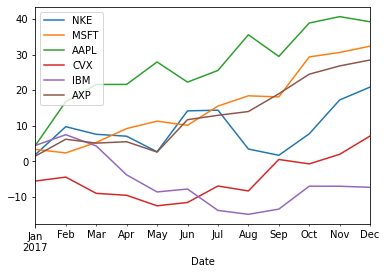

In [22]:
month_sum_q.plot();

In [23]:
# ВНИМАНИЕ не ОШИБИСЬ С ОПЕРАТОРОМ почему тут стоит LAST, а не sum или prod
# ВНИМАНИЕ почему такой код лучше предидушего?

month_sum=daily_sum_0.resample('MS').first()
month_sum

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-01,2.055631,1.660204,10.508701,-5.921742,4.278616,1.921888
2017-03-01,11.076626,3.810782,18.785065,-3.265440,8.628029,8.484267
2017-04-01,7.243586,4.784044,21.597454,-8.659751,4.482449,4.411815
2017-05-01,6.257814,10.553616,23.633733,-10.342628,-4.767146,5.435854
2017-06-01,1.324216,11.625001,28.180253,-11.802314,-8.643229,4.294773
2017-07-01,13.544438,8.984884,21.877151,-9.747979,-6.712911,12.689046
2017-08-01,15.682313,15.324443,26.406029,-5.540033,-13.430616,12.901177
2017-09-01,4.450438,17.272244,35.594667,-7.329388,-14.230761,14.003360


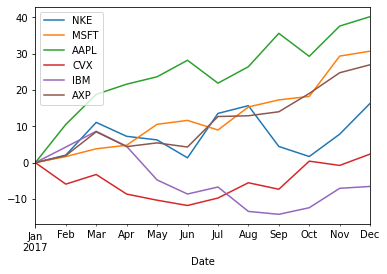

In [24]:
month_sum.plot();

In [25]:
month_prod=daily_prod_0.resample('MS').first()
month_prod

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2017-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-02-01,1.020008,1.015980,1.108480,0.941875,1.042467,1.018713
2017-03-01,1.114852,1.037712,1.203530,0.966313,1.088283,1.087193
2017-04-01,1.068873,1.047459,1.237193,0.914722,1.043723,1.042999
2017-05-01,1.057907,1.109140,1.261989,0.898770,0.950057,1.051493
2017-06-01,1.006156,1.120166,1.318812,0.884769,0.913153,1.038885
2017-07-01,1.128319,1.089326,1.235471,0.901994,0.930558,1.129396
2017-08-01,1.151212,1.159795,1.291864,0.940008,0.869071,1.131254
2017-09-01,1.026549,1.181528,1.412398,0.922868,0.861774,1.143198


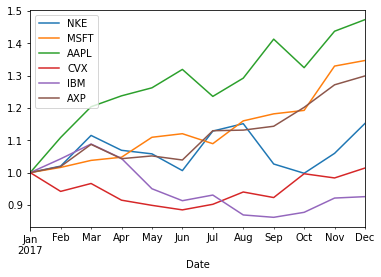

In [26]:
month_prod.plot();

### Скользящее среднее

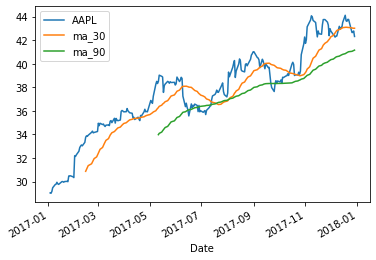

In [27]:
aapl_close=stoks_close['AAPL']
ma_30=aapl_close.rolling(30).mean()
ma_90=aapl_close.rolling(90).mean()
result=pd.concat([aapl_close,ma_30,ma_90],axis=1)
result.columns=['AAPL','ma_30','ma_90']
result.plot();

In [28]:
aapl_close=daily_sum_0['AAPL']
msft_close=daily_sum_0['MSFT']

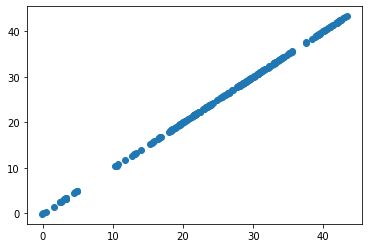

In [29]:
plt.scatter(aapl_close,aapl_close);

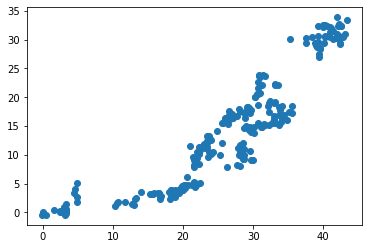

In [30]:
plt.scatter(aapl_close,msft_close);

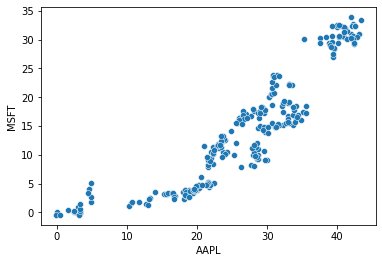

In [31]:
df=pd.concat([aapl_close,msft_close],axis=1)
sns.scatterplot(x="AAPL", y="MSFT",data=df);

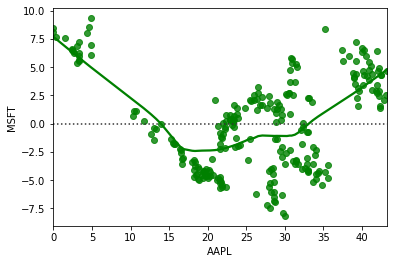

In [32]:
sns.residplot( x = aapl_close, y = msft_close, lowess=True, color="g");

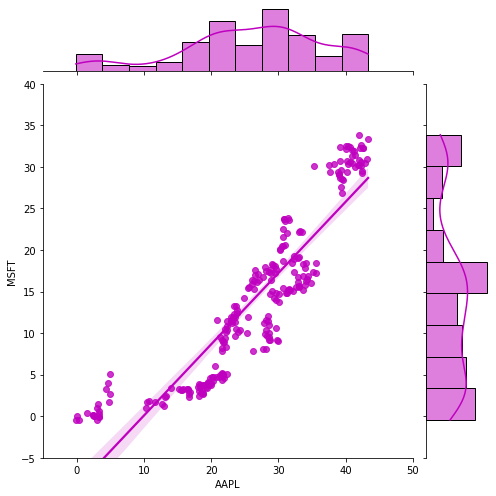

In [33]:
sns.jointplot(x="AAPL", y="MSFT", data=df, kind="reg", xlim=(-5,50), ylim=(-5,40), color="m", height=7);

### Волатильность

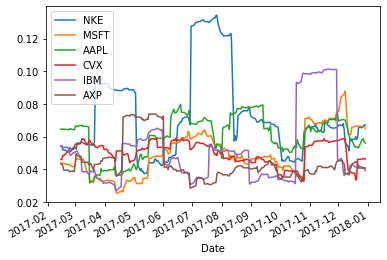

In [34]:
per=30

vol=daily_pct_0.rolling(per).std()*np.sqrt(per)
vol.plot();

### Оценикм риск

In [35]:
df_risk=pd.concat([daily_pct_0.mean(),daily_pct_0.std()],axis=1)
df_risk.columns=["mean",'std']
df_risk

,mean,std
NKE,0.000830,0.013725
MSFT,0.001289,0.009313
AAPL,0.001562,0.011135
CVX,0.000282,0.009084
IBM,-0.000294,0.009963
AXP,0.001134,0.008221


<AxesSubplot:xlabel='mean', ylabel='std'>

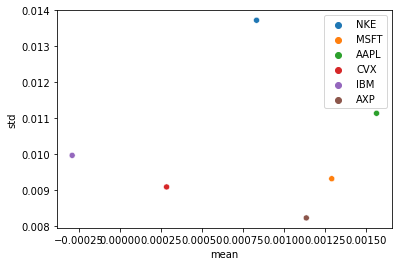

In [36]:
sns.scatterplot(x="mean", y="std",data=df_risk,hue=df_risk.index)

### Взаимная корреляция

напомним про клику и диверсификацию портфеля

In [37]:
corr=daily_pct_0.corr()
corr

,NKE,MSFT,AAPL,CVX,IBM,AXP
NKE,1.000000,0.024201,0.086174,0.016459,0.049699,0.159342
MSFT,0.024201,1.000000,0.438367,-0.114116,0.062886,0.241824
AAPL,0.086174,0.438367,1.000000,-0.014443,-0.020902,0.255991
CVX,0.016459,-0.114116,-0.014443,1.000000,0.094753,0.185144
IBM,0.049699,0.062886,-0.020902,0.094753,1.000000,0.222741
AXP,0.159342,0.241824,0.255991,0.185144,0.222741,1.000000


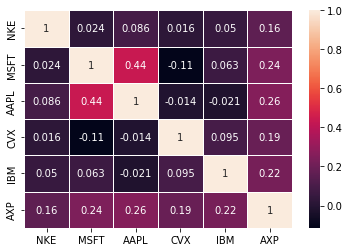

In [38]:
sns.heatmap(corr, annot=True, linewidths=.5);